In [10]:

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset with only the required columns
df = pd.read_csv('dataset/sales_4.csv', usecols=['date', 'product_count'])

# Convert the date column to datetime format if not already done
df['date'] = pd.to_datetime(df['date'])

# Filter data from 2021 to 2023 for training
train_df = df[(df['date'] >= '2021-01-01') & (df['date'] <= '2023-12-31')]

# Aggregate the data on a monthly basis
monthly_train_df = train_df.resample('M', on='date').sum().reset_index()

# Rename columns for Prophet
monthly_train_df.rename(columns={'date': 'ds', 'product_count': 'y'}, inplace=True)
monthly_train_df.head(5)


,ds,y
0,2021-01-31,127776
1,2021-02-28,133930
2,2021-03-31,154891
3,2021-04-30,153073
4,2021-05-31,142206


In [11]:

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(monthly_train_df)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=12, freq='M')
future.head(5)


02:56:44 - cmdstanpy - INFO - Chain [1] start processing
02:56:44 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,2021-01-31
1,2021-02-28
2,2021-03-31
3,2021-04-30
4,2021-05-31


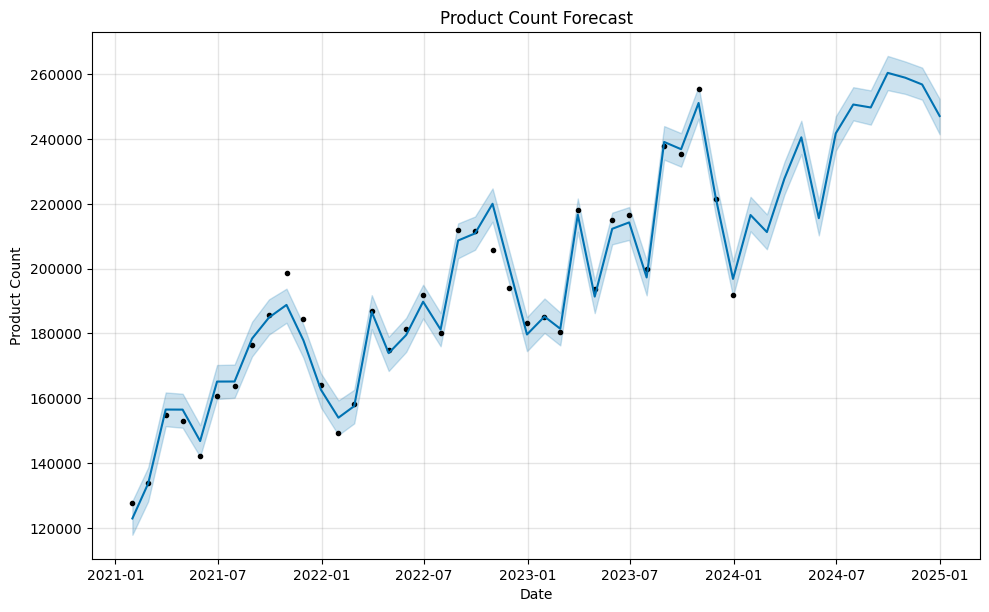

In [12]:

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Product Count Forecast')
plt.xlabel('Date')
plt.ylabel('Product Count')
plt.show()


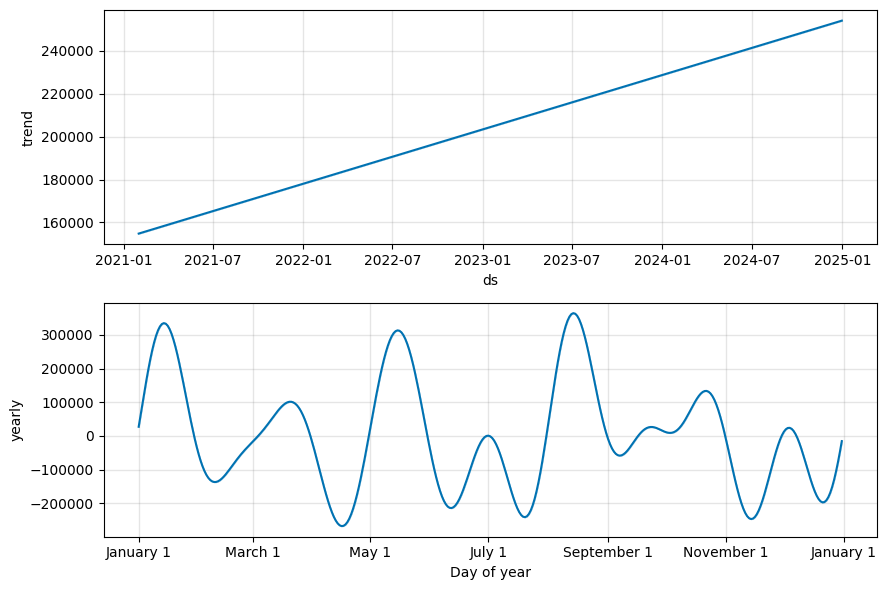

In [13]:


# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()


In [25]:

df.head(5)


,date,product_count
0,2021-01-01,1
1,2021-01-01,1
2,2021-01-01,1
3,2021-01-01,1
4,2021-01-01,1


In [26]:
df_monthly= df.resample('M', on='date').sum().reset_index()
df_monthly.head(5)


,date,product_count
0,2021-01-31,127776
1,2021-02-28,133930
2,2021-03-31,154891
3,2021-04-30,153073
4,2021-05-31,142206


In [27]:
forecast.head(5)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-31,154812.371736,117916.566612,128328.834945,154812.371736,154812.371736,-31860.907196,-31860.907196,-31860.907196,-31860.907196,-31860.907196,-31860.907196,0.0,0.0,0.0,122951.464540
1,2021-02-28,156756.136924,128224.475007,138692.048897,156756.136924,156756.136924,-23008.752089,-23008.752089,-23008.752089,-23008.752089,-23008.752089,-23008.752089,0.0,0.0,0.0,133747.384836
2,2021-03-31,158908.162669,151387.644855,161802.269436,158908.162669,158908.162669,-2375.038004,-2375.038004,-2375.038004,-2375.038004,-2375.038004,-2375.038004,0.0,0.0,0.0,156533.124664
3,2021-04-30,160990.768226,150921.390713,161406.116816,160990.768226,160990.768226,-4480.689731,-4480.689731,-4480.689731,-4480.689731,-4480.689731,-4480.689731,0.0,0.0,0.0,156510.078495
4,2021-05-31,163142.793968,141979.450261,151706.712795,163142.793968,163142.793968,-16322.878069,-16322.878069,-16322.878069,-16322.878069,-16322.878069,-16322.878069,0.0,0.0,0.0,146819.915900


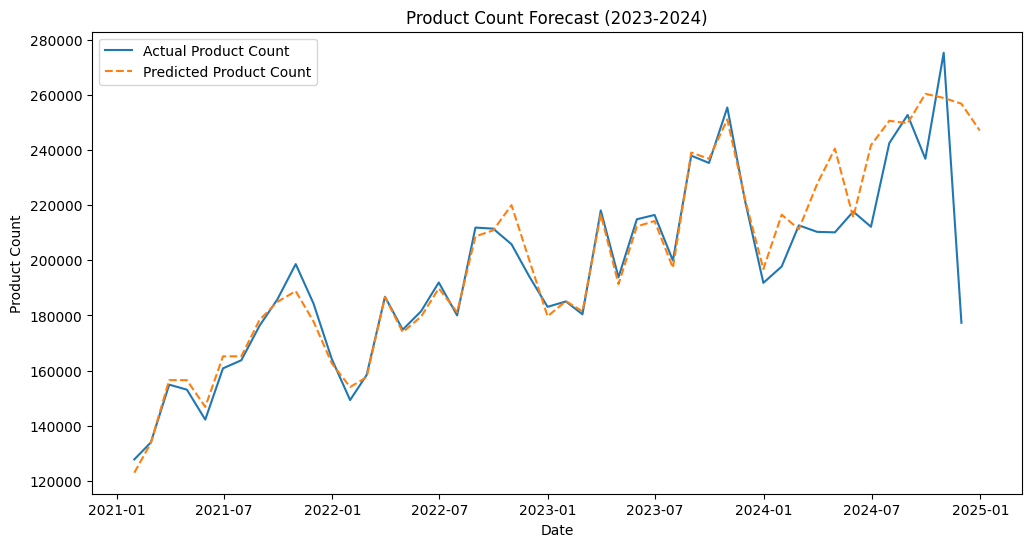

In [28]:
# Plot the whole dataset and the prediction
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['date'], df_monthly['product_count'], label='Actual Product Count')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Product Count', linestyle='--')
plt.title('Product Count Forecast (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Product Count')
plt.legend()
plt.show()

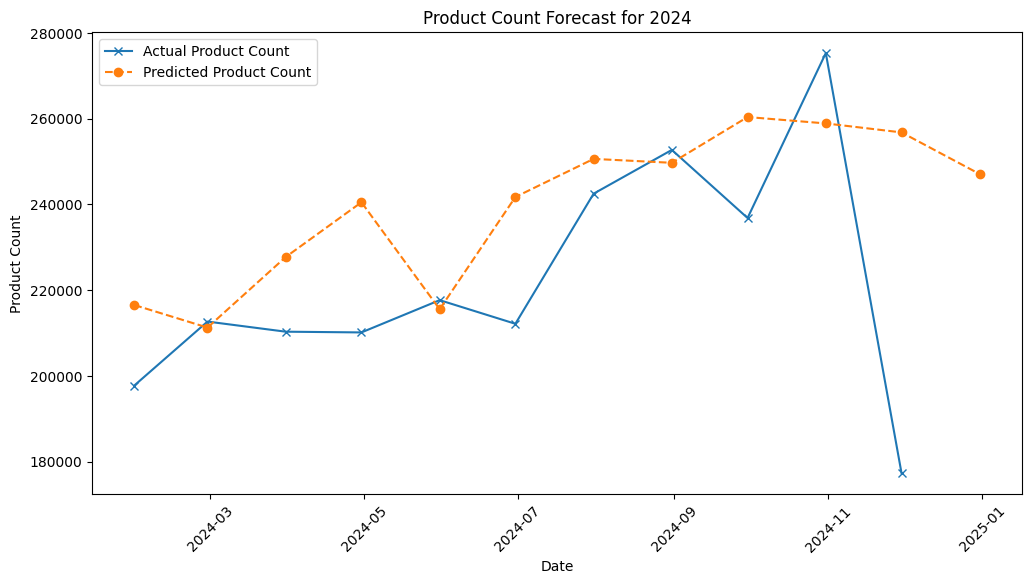

In [37]:
# Filter the forecast dataframe for the year 2024
forecast_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-12-31')]
df_monthly_2024 = df_monthly[df_monthly['date'].dt.year == 2024]
# Plot the product count for every month of 2024
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_2024['date'], df_monthly_2024['product_count'], marker='x', label='Actual Product Count')
plt.plot(forecast_2024['ds'], forecast_2024['yhat'], marker='o', linestyle='--', label='Predicted Product Count')
plt.title('Product Count Forecast for 2024')
plt.xlabel('Date')
plt.ylabel('Product Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()